## Времянные ряды 5



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
def add_first_diff(data, postfix=""):
    first_diff = np.array(data.iloc[1:,0].values - data.iloc[:-1,0].values).astype('float32') 
    data['diff1'+postfix] = 0.
    data['diff1'+postfix].values[1:] = first_diff    
    
    p = 7
    for i in range(p):
        data['d'+str(p-i)+postfix]=0.
        data['d'+str(p-i)+postfix].values[p:] = data['diff1'+postfix].values[i:-(p)+i]    

__1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями__

In [3]:
data_base = pd.read_csv('../lesson5/my_BRENT2019.csv', index_col=[0], parse_dates=[0])
data = data_base.copy()

In [4]:
add_first_diff(data)

In [5]:
data.head(10)

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,diff1,d7,d6,d5,d4,d3,d2,d1
Дата,,,,,,,,,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,0.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,-0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010-09-06,76.87,2010,9,6,3,249,36,0,1,0,0,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010-09-07,77.26,2010,9,7,3,250,36,1,0,0,1,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2010-09-08,77.93,2010,9,8,3,251,36,2,0,0,0,0.67,0.00,0.52,-0.32,0.05,0.01,0.24,0.39
2010-09-09,77.21,2010,9,9,3,252,36,3,0,0,0,-0.72,0.52,-0.32,0.05,0.01,0.24,0.39,0.67


__2. Добавьте первые разности по стоимости доллара и евро к рублю (можно добавить и сами курсы валют - прошлые значения)__

In [6]:
rub_doll= pd.read_csv('../lesson5/usd.csv',sep=';').rename(columns={'data': 'Дата'}).set_index('Дата')
rub_e   = pd.read_csv('../lesson5/eu.csv',sep=';').rename(columns={'data': 'Дата'}).set_index('Дата')

In [7]:
add_first_diff(rub_doll, "_usd")
rub_doll.head()

,curs,diff1_usd,d7_usd,d6_usd,d5_usd,d4_usd,d3_usd,d2_usd,d1_usd
Дата,,,,,,,,,
01.09.2010,30.8669,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02.09.2010,30.8001,-0.0668,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03.09.2010,30.6858,-0.1143,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04.09.2010,30.6922,0.0064,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07.09.2010,30.5771,-0.1151,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
add_first_diff(rub_e, "_eur")
rub_e.head()

,curs,diff1_eur,d7_eur,d6_eur,d5_eur,d4_eur,d3_eur,d2_eur,d1_eur
Дата,,,,,,,,,
01.09.2010,39.0127,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02.09.2010,39.1654,0.1527,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03.09.2010,39.2901,0.1247,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04.09.2010,39.3505,0.0604,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07.09.2010,39.4720,0.1215,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data = data.join(rub_doll.drop(columns='curs'))
data = data.join(rub_e.drop(columns='curs'))

Фиксим NaN

In [10]:
data.iloc[:9,18:]

,d1,diff1_usd,d7_usd,d6_usd,d5_usd,d4_usd,d3_usd,d2_usd,d1_usd,diff1_eur,d7_eur,d6_eur,d5_eur,d4_eur,d3_eur,d2_eur,d1_eur
Дата,,,,,,,,,,,,,,,,,
2010-09-01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-02,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-03,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-04,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-05,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-06,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-07,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-08,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-09,0.67,0.1554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0267,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data.iloc[:8,19:] = 0.0

In [12]:
cs = ['diff1_usd', 'd7_usd', 'd6_usd', 'd5_usd', 'd4_usd', 'd3_usd', 'd2_usd', 
      'd1_usd', 'diff1_eur', 'd7_eur', 'd6_eur', 'd5_eur', 'd4_eur', 'd3_eur', 
      'd2_eur', 'd1_eur']

In [13]:
for i in range(data.shape[0]):
    for p in range(data.shape[1]):
        if np.isnan(data.iloc[i,p]):
            data.iloc[i,p] = data.iloc[i-1,p]
        elif np.isinf(data.iloc[i,p]):
            data.iloc[i,p] = 1e-5
    

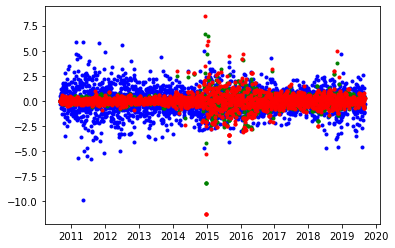

In [14]:
plt.plot(data.index,    data['diff1'].values, '.b', label='Brent ')
plt.plot(data.index,data['diff1_usd'].values,'.g', label='doll - rub')
plt.plot(data.index,   data['diff1_eur'].values,'.r', label='euro - rub')
plt.show()

__3. сделайте ее перрасчет (ресемплинг) в представление по неделям.__

In [15]:
data_w = data.resample('W').mean()

__4. Постройте модель предсказания 1-й точки от текущей (h=1).__

In [16]:
from sklearn.preprocessing import StandardScaler
scl_target=StandardScaler() 
h=1
target = data_w['Значение'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(435, 1)

In [17]:
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(435, 35)

In [18]:
for i in range(X.shape[0]):
    for p in range(X.shape[1]):
        if np.isnan(X[i,p]):
            X[i,p] = X[i-1,p]
        elif np.isinf(X[i,p]):
            X[i,p] = 1e-5
for i in range(y.shape[0]):
    if np.isnan(y[i]):
        y[i] = y[i-1]
    elif np.isinf(y[i]):
        y[i] = 1e-5    

In [19]:
from sklearn.feature_selection import f_regression,SelectKBest,SelectPercentile,SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)

sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())

sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())

gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)

In [20]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0  1  7 19 27]
Номера признаков лучших признаков по процентной форме:  [ 0  1  7 19]
Номера признаков для выбора по модели :  [0]


In [21]:
list_par= list(set(list_param_k).union(list_param_p).union(list_param_m))
data_w.columns[list_par]

Index(['Значение', 'year', 'diff1_usd', 'dayofweek', 'diff1_eur'], dtype='object')

In [22]:
X_new = X[:,list_par]

In [23]:
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Дата') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Дата') >  split_date].copy()

In [24]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [25]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
train, test = split_data( data_w, '01-01-2015')
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [27]:
param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: -0.891 (std: 3.185)
Parameters: {'n_estimators': 200, 'max_depth': 1}

Model with rank: 2
Mean validation score: -1.003 (std: 3.356)
Parameters: {'n_estimators': 500, 'max_depth': 3}

Model with rank: 3
Mean validation score: -1.039 (std: 3.008)
Parameters: {'n_estimators': 400, 'max_depth': 5}



In [28]:
model_g_best = GradientBoostingRegressor(max_depth=1,  n_estimators=500)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print(f'MAPE: {er_g}%')

MAPE: 5.896930872379602%


__5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.__

In [29]:
data_w1 = data_base.resample('W').mean()
X1 = data_w1.values
y1 = data_w1['Значение'].values


for i in range(X1.shape[0]):
    for p in range(X1.shape[1]):
        if np.isnan(X1[i,p]):
            X1[i,p] = X1[i-1,p]
        elif np.isinf(X1[i,p]):
            X1[i,p] = 1e-5
for i in range(y1.shape[0]):
    if np.isnan(y1[i]):
        y1[i] = y1[i-1]
    elif np.isinf(y1[i]):
        y[i] = 1e-5 
        
train1, test1 = split_data(data_w1, '01-01-2015')
X_train1 =X1[:train1.shape[0],:]
y_train1 =y1[:train1.shape[0]]
X_test1 =X1[train1.shape[0]:,:]
y_test1 =y1[train1.shape[0]:]

In [30]:
param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train1, y_train1)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.977 (std: 0.034)
Parameters: {'n_estimators': 500, 'max_depth': 1}

Model with rank: 2
Mean validation score: 0.973 (std: 0.032)
Parameters: {'n_estimators': 400, 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.971 (std: 0.033)
Parameters: {'n_estimators': 100, 'max_depth': 2}



In [31]:
model_g_best = GradientBoostingRegressor(max_depth=2,  n_estimators=100)
model_g_best.fit( X_train1, y_train1 ) 
y_test_pred_g1 = model_g_best.predict(X_test1)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test1),y_pred = scl_target.inverse_transform( y_test_pred_g1))
print(f'MAPE: {er_g}%')

MAPE: 16.650132034238215%


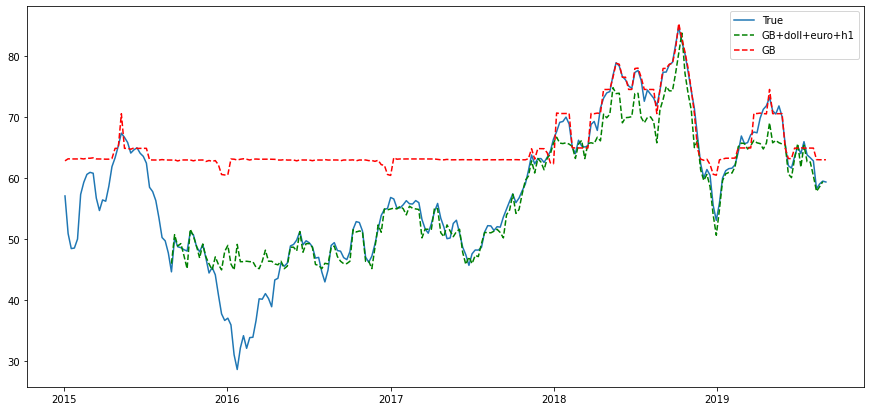

In [36]:
plt.figure(figsize=(15, 7))

plt.plot(test.index,test['Значение'], label='True')
plt.plot(data_w.iloc[34:-h,:].iloc[train.shape[0]:].index,scl_target.inverse_transform(y_test_pred_g),'--g',label='GB+doll+euro+h1')
plt.plot(data_w1.iloc[train1.shape[0]:].index, y_test_pred_g1, '--r',label='GB')

plt.legend()
plt.show()

__Вывод__   
Модель прямого предсказания, сильно хуже